In [1]:
from zokyo.augmentation import Builder # Import Builder class from zokyo

import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def teardown():
    """
    Function clear output folders
    """
    shutil.rmtree('output/images')
    shutil.rmtree('output/masks')
    shutil.rmtree('output/annotations')

There are 2 ways to perform augmentation operations using the instance of a Builder class:
1. **process_and_save**: process the images from the directory given in the config and save the augmentations it to the specified directory.
2. **process_and_generate**: process the images from the directory given in the config and obatin a generator which yields batches of the augmented images. This function accepts batch_size (determines number of augmented images in the output batch) and internal_batch (determines number of images augmented internally).

### Process and Save

In [3]:
builder_1 = Builder('configs/builder_save_config.json')
builder_1.process_and_save()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.69it/s]


In [4]:
teardown()

### Process and Generate

In [5]:
builder_2 = Builder('configs/builder_generator_config.json')
gen = builder_2.process_and_generate(batch_size=2)

2022-01-17 17:58:15,954 [Zokyo Builder] [INFO] sample factor : 3
2022-01-17 17:58:15,954 [Zokyo Builder] [INFO] batch size : 2
2022-01-17 17:58:15,958 [Zokyo Builder] [INFO] Entities num: 6


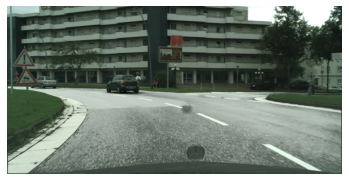

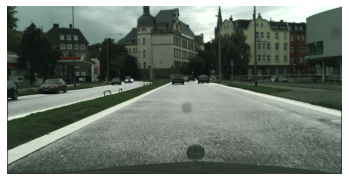

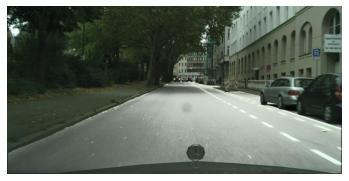

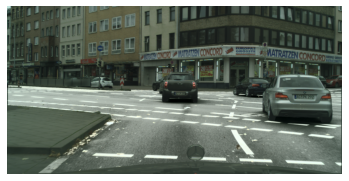

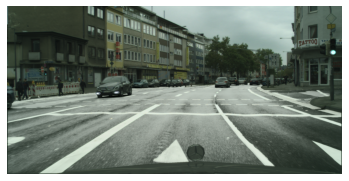

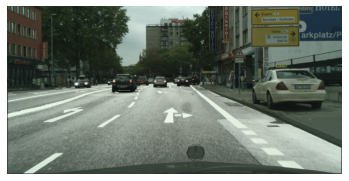

In [6]:
i = 0 
while True:
    try:
        res = next(gen) # each item in this batch is an instance of ZokyoData class
        for item in res:
            plt.figure()
            plt.axis('off')
            plt.imshow(item.image)
        i += 1

    except StopIteration:
        break